# Course: Advanced Big Data and Data Mining – Bi-term 2
# Student: Banoj Kumar Jena

In [1]:

# Course: Advanced Big Data and Data Mining – Bi-term 2
# Student: Banoj Kumar Jena

# ---------------------------------------------
# Step 1: Import Required Libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual settings
# plt.style.use('seaborn-whitegrid') # Removed invalid style
sns.set_palette("Set2")
%matplotlib inline


In [2]:
# ---------------------------------------------
# Step 2: Load the Dataset
# ---------------------------------------------
file_path = 'Chocolate Sales.csv'
df = pd.read_csv(file_path)

In [3]:
# ---------------------------------------------
# Step 3: Inspect the Dataset
# ---------------------------------------------
print("Dataset Shape:", df.shape)
print("\nDataset Preview:")
display(df.head())

print("\nData Types and Non-Null Counts:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Dataset Shape: (1094, 6)

Dataset Preview:


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184



Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB
None

Descriptive Statistics:
         Sales Person    Country  Product       Date   Amount  Boxes Shipped
count            1094       1094     1094       1094     1094    1094.000000
unique             25          6       22        168      827            NaN
top     Kelci Walkden  Australia  Eclairs  30-Jun-22  $2,317             NaN
freq               54        205       60         16        5            NaN
mean              NaN        NaN      NaN        Na

In [4]:
# ---------------------------------------------
# Step 4: Clean Column Names
# ---------------------------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("\nCleaned Column Names:", df.columns.tolist())


Cleaned Column Names: ['sales_person', 'country', 'product', 'date', 'amount', 'boxes_shipped']


In [5]:
# ---------------------------------------------
# Step 5: Handle Missing Values
# ---------------------------------------------
print("\nMissing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
sales_person     0
country          0
product          0
date             0
amount           0
boxes_shipped    0
dtype: int64


In [6]:
# ---------------------------------------------
# Step 6: Remove Duplicates
# ---------------------------------------------
print("\nDuplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Remaining Rows After Removing Duplicates:", df.shape[0])



Duplicate Rows: 0
Remaining Rows After Removing Duplicates: 1094


In [7]:
# ---------------------------------------------
# Step 7: Convert Data Types
# ---------------------------------------------
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert 'amount' and 'boxes_shipped' to numeric
df['amount'] = df['amount'].astype(str).str.replace(r'[$,]', '', regex=True) # Remove '$' and ','
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['boxes_shipped'] = pd.to_numeric(df['boxes_shipped'], errors='coerce')

# Drop rows where critical fields are null
df.dropna(subset=['date', 'amount', 'boxes_shipped'], inplace=True)


/tmp/ipython-input-7-500980704.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


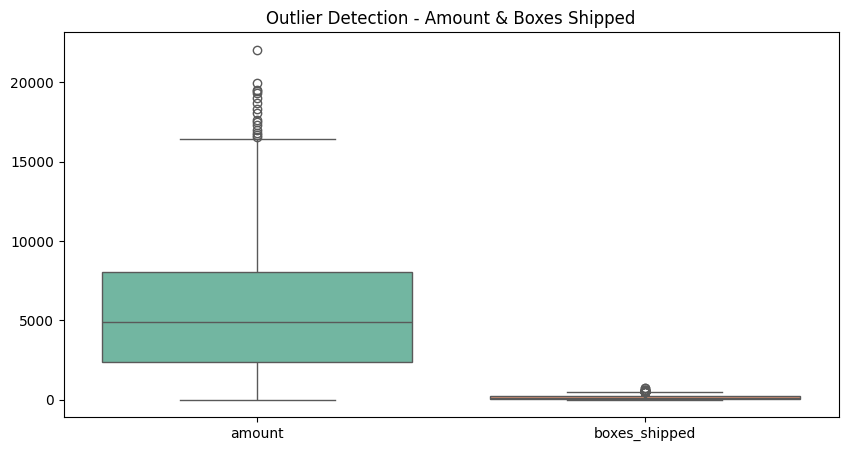

In [8]:
# ---------------------------------------------
# Step 8: Outlier Detection
# ---------------------------------------------
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['amount', 'boxes_shipped']])
plt.title("Outlier Detection - Amount & Boxes Shipped")
plt.show()

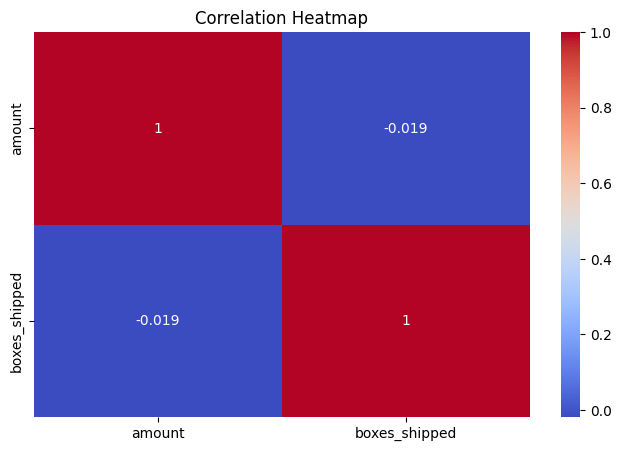

In [9]:
# ---------------------------------------------
# Step 9: Correlation Heatmap
# ---------------------------------------------
plt.figure(figsize=(8, 5))
sns.heatmap(df[['amount', 'boxes_shipped']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-10-2024062744.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='amount', data=df, estimator=sum, ci=None)


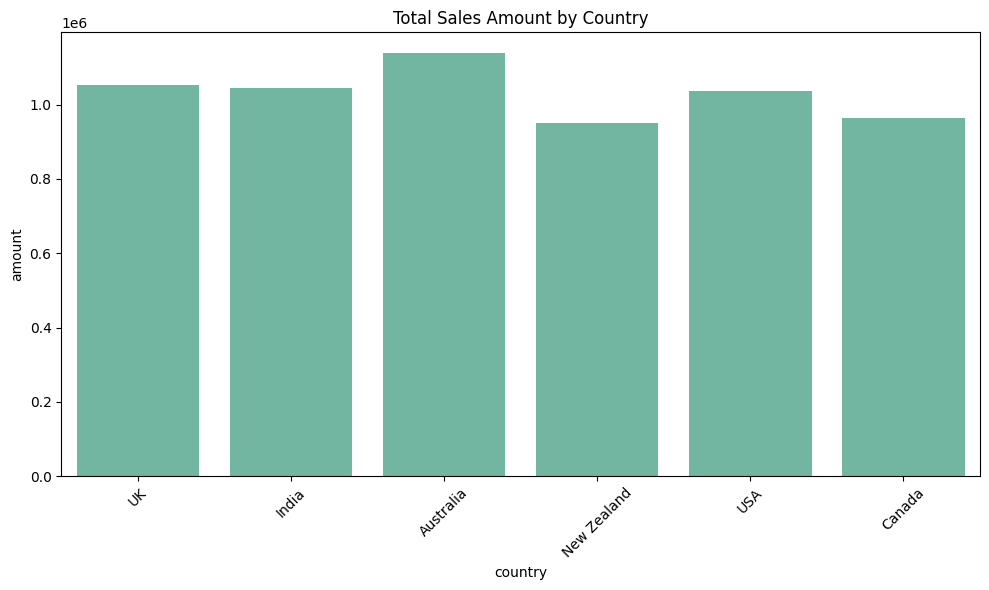

In [10]:
# ---------------------------------------------
# Step 10: Sales by Country
# ---------------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='amount', data=df, estimator=sum, ci=None)
plt.title("Total Sales Amount by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-4293781094.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='product', y='amount', data=df, estimator=sum, ci=None)


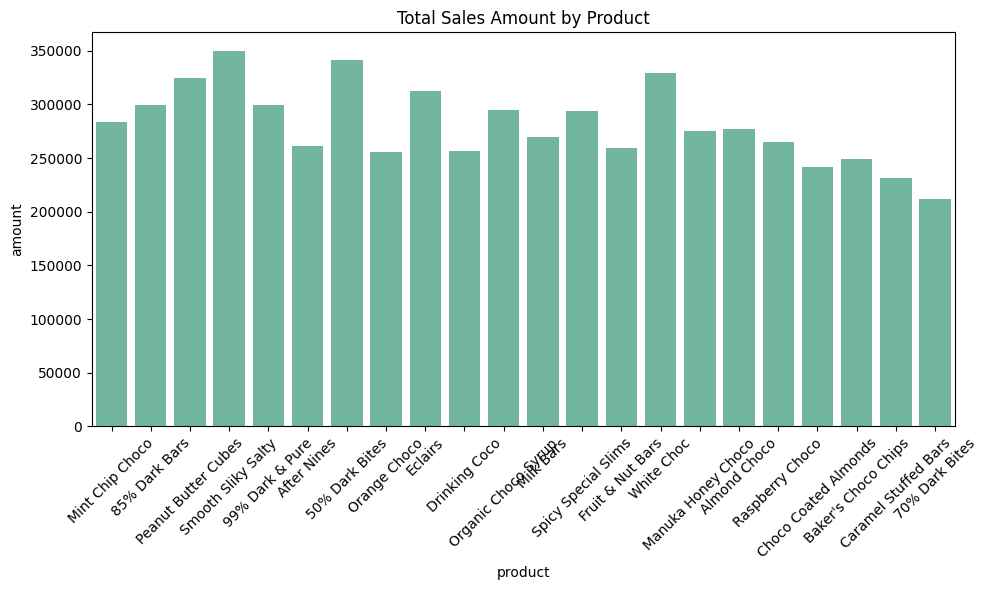

In [11]:
# ---------------------------------------------
# Step 11: Sales by Product
# ---------------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x='product', y='amount', data=df, estimator=sum, ci=None)
plt.title("Total Sales Amount by Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



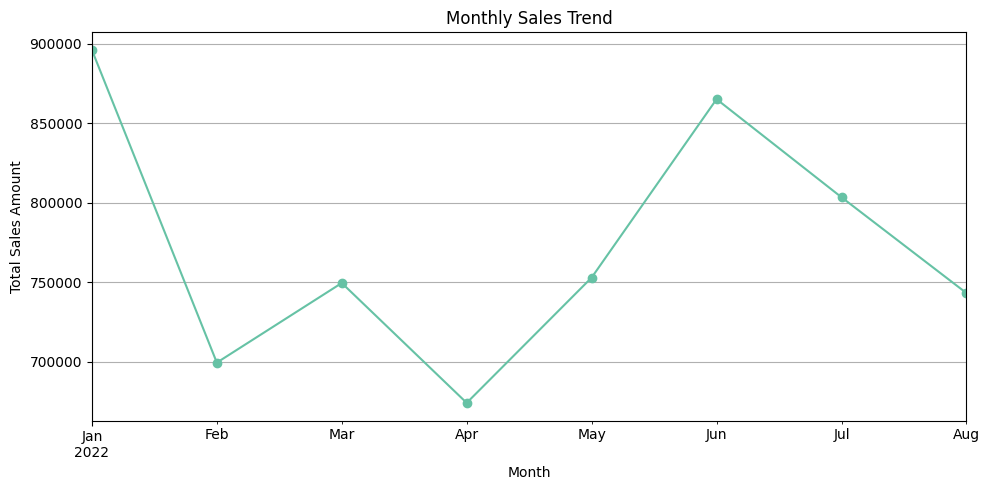

In [12]:
# ---------------------------------------------
# Step 12: Monthly Sales Trend
# ---------------------------------------------
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['amount'].sum()

monthly_sales.plot(
    kind='line',
    marker='o',
    figsize=(10, 5),
    title='Monthly Sales Trend'
)
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.tight_layout()
plt.show()



In [14]:
# ---------------------------------------------
# Step 13: Final Insights Summary
# ---------------------------------------------
print(" Final Key Insights:")
print("1. Some countries consistently generate higher sales.")
print("2. Certain products (e.g., dark chocolate, truffle) outperform others.")
print("3. Seasonal spikes are visible in monthly trends.")
print("4. Outliers exist in both amount and boxes shipped.")
print("5. 'Amount' and 'Boxes Shipped' are positively correlated, as expected.")


df.to_csv("chocolate_sales_cleaned.csv", index=False)

 Final Key Insights:
1. Some countries consistently generate higher sales.
2. Certain products (e.g., dark chocolate, truffle) outperform others.
3. Seasonal spikes are visible in monthly trends.
4. Outliers exist in both amount and boxes shipped.
5. 'Amount' and 'Boxes Shipped' are positively correlated, as expected.
